In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **Data Description :** 

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Capstone Project Dataset - Mar20 DSE/accepted_2007_to_2018Q4.csv',low_memory=False)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,...,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,...,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,...,218418.0,18696.0,6200.0,14877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,NaN,NaN,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,...,381215.0,52226.0,62500.0,18000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,w,0.00,0.00,...,439570.0,95768.0,20300.0,88097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(2260701, 151)

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 151 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   id                                          object 
 1   member_id                                   float64
 2   loan_amnt                                   float64
 3   funded_amnt                                 float64
 4   funded_amnt_inv                             float64
 5   term                                        object 
 6   int_rate                                    float64
 7   installment                                 float64
 8   grade                                       object 
 9   sub_grade                                   object 
 10  emp_title                                   object 
 11  emp_length                                  object 
 12  home_ownership                              object 
 13  annual_inc                

***This dataset has 113 float type features and 38 object features.***

## **Data Cleaning**

In [5]:
pd.set_option('display.max_rows',151)
def missing_check(data):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
    missing_perc = pd.concat([total,percent],axis=1,keys=['total','percent'])
    return missing_perc
missing_check(df)

,total,percent
member_id,2260701,100.000000
orig_projected_additional_accrued_interest,2252050,99.617331
hardship_loan_status,2249784,99.517097
hardship_dpd,2249784,99.517097
hardship_reason,2249784,99.517097
hardship_status,2249784,99.517097
deferral_term,2249784,99.517097
hardship_amount,2249784,99.517097
hardship_start_date,2249784,99.517097
hardship_end_date,2249784,99.517097


In [6]:
pct_null = df.isnull().sum() / len(df)
missing_features = list(pct_null[pct_null > 0.40].index)
df.drop(missing_features, axis=1, inplace=True)

***Removing features that has more than 50% null values. These features can be dropped as it will add noise and won't help in analysis.***

In [7]:
print('Number of features with more than 40% null values :',len(missing_features))

Number of features with more than 40% null values : 46


In [8]:
df.shape

(2260701, 105)

In [9]:
pd.set_option('display.max_rows',151)
def missing_check(data):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
    missing_perc = pd.concat([total,percent],axis=1,keys=['total','percent'])
    return missing_perc
missing_check(df)

,total,percent
all_util,866381,38.323555
inq_last_12m,866163,38.313912
total_cu_tl,866163,38.313912
open_acc_6m,866163,38.313912
total_bal_il,866162,38.313868
open_act_il,866162,38.313868
open_il_12m,866162,38.313868
open_il_24m,866162,38.313868
inq_fi,866162,38.313868
max_bal_bc,866162,38.313868


In [10]:
df.nunique().sort_values(ascending=False)

id                            2260701
url                           2260668
total_pymnt                   1633857
total_pymnt_inv               1311099
last_pymnt_amnt                704467
total_rec_int                  635921
tot_hi_cred_lim                529972
emp_title                      512694
tot_cur_bal                    487688
total_rec_prncp                486463
out_prncp_inv                  368481
out_prncp                      356141
total_bal_ex_mort              212777
total_il_high_credit_limit     194137
total_bal_il                   162249
collection_recovery_fee        146222
recoveries                     132777
revol_bal                      102251
installment                     93301
bc_open_to_buy                  91500
annual_inc                      89368
avg_cur_bal                     88597
title                           63155
total_rev_hi_lim                34220
max_bal_bc                      33726
total_bc_limit                  20309
total_rec_la

In [11]:
df.drop(['id','url'],axis=1,inplace=True)

***We can see that these features has unique values, so we can drop them.***

1. id                            2260701
2. url                           2260668


In [12]:
df['zip_code'].value_counts()

112xx    23908
945xx    23782
750xx    23649
606xx    21192
300xx    20497
         ...  
202xx        1
375xx        1
862xx        1
892xx        1
817xx        1
Name: zip_code, Length: 956, dtype: int64

In [13]:
df.drop(['zip_code'],axis=1,inplace=True)

***We can remove ZipCode as it has only first 3 number***

In [14]:
df['policy_code'].value_counts()

1.0    2260668
Name: policy_code, dtype: int64

In [15]:
df.drop(['policy_code'],axis=1,inplace=True)

***Since, policy code has only single value we can remove this feature.***

In [16]:
df['title'].value_counts().head()

Debt consolidation         1153293
Credit card refinancing     469691
Home improvement            137437
Other                       127714
Major purchase               44840
Name: title, dtype: int64

In [17]:
df.drop('title',axis=1,inplace=True)

***We can remove title feature as it is the duplicate of purpose feature.***

In [18]:
df[['last_fico_range_high','last_fico_range_low']].head()

,last_fico_range_high,last_fico_range_low
0,564.0,560.0
1,699.0,695.0
2,704.0,700.0
3,679.0,675.0
4,704.0,700.0


In [19]:
df.drop(['last_fico_range_high','last_fico_range_low'],axis=1,inplace=True)

***Last fico score pulled is not required as we have latest fico score range column separately.*** 

In [20]:
df[['all_util','inq_last_12m','total_cu_tl','open_acc_6m','total_bal_il','open_act_il',
   'open_il_12m','open_il_24m','inq_fi','max_bal_bc','open_rv_12m','open_rv_24m']]

,all_util,inq_last_12m,total_cu_tl,open_acc_6m,total_bal_il,open_act_il,open_il_12m,open_il_24m,inq_fi,max_bal_bc,open_rv_12m,open_rv_24m
0,34.0,4.0,1.0,2.0,4981.0,2.0,0.0,1.0,3.0,722.0,3.0,3.0
1,29.0,6.0,0.0,1.0,18005.0,1.0,0.0,1.0,0.0,6472.0,2.0,3.0
2,65.0,1.0,5.0,0.0,10827.0,1.0,0.0,4.0,2.0,2081.0,0.0,2.0
3,45.0,0.0,1.0,1.0,12609.0,1.0,0.0,1.0,0.0,6987.0,1.0,1.0
4,78.0,3.0,1.0,1.0,73839.0,3.0,0.0,3.0,2.0,9702.0,4.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2260696,51.0,2.0,0.0,0.0,19765.0,2.0,0.0,1.0,3.0,5141.0,0.0,0.0
2260697,73.0,1.0,0.0,0.0,44785.0,2.0,0.0,2.0,0.0,6172.0,1.0,5.0
2260698,84.0,2.0,1.0,0.0,32071.0,1.0,1.0,2.0,3.0,4093.0,0.0,1.0
2260699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df.drop(['all_util','inq_last_12m','total_cu_tl','open_acc_6m','total_bal_il','open_act_il',
   'open_il_12m','open_il_24m','inq_fi','max_bal_bc','open_rv_12m','open_rv_24m'],axis=1,inplace=True)

***Removing these features as it all based on trades, credits and revolving account balance.*** 

In [22]:
df.drop('mths_since_recent_inq',axis=1,inplace=True)

***Since, it is just about recent inquiry we can drop it.*** 

In [23]:
missing_check(df)

,total,percent
emp_title,167002,7.387178
num_tl_120dpd_2m,153690,6.798334
emp_length,146940,6.499754
mo_sin_old_il_acct,139104,6.153136
bc_util,76104,3.366389
percent_bc_gt_75,75412,3.335779
bc_open_to_buy,74968,3.316140
mths_since_recent_bc,73445,3.248771
pct_tl_nvr_dlq,70464,3.116909
avg_cur_bal,70379,3.113149


In [24]:
a = df['loan_status'].value_counts(normalize=True)*100
a

Fully Paid                                             47.629771
Current                                                38.852100
Charged Off                                            11.879630
Late (31-120 days)                                      0.949587
In Grace Period                                         0.373164
Late (16-30 days)                                       0.192377
Does not meet the credit policy. Status:Fully Paid      0.087939
Does not meet the credit policy. Status:Charged Off     0.033663
Default                                                 0.001769
Name: loan_status, dtype: float64

In [25]:
df1 = df.dropna(axis=0)

In [26]:
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,...,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,debt_consolidation,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,...,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,small_business,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,...,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,home_improvement,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,22705.924294,22705.92,20000.00,2705.92,0.0,0.0,0.0,Jun-2017,...,0.0,189699.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,debt_consolidation,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,31464.010000,31464.01,19102.35,12361.66,0.0,0.0,0.0,Feb-2019,...,0.0,301500.0,67300.0,2.0,23192.0,54962.0,12.1,0.0,0.0,36.0,87.0,2.0,2.0,1.0,2.0,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N
4,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,major_purchase,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,0.00,0.00,11740.500000,11740.50,10400.00,1340.50,0.0,0.0,0.0,Jul-2016,...,0.0,331730.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N


In [27]:
df1.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
fico_range_low                0
fico_range_high               0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prnc

In [28]:
b = df1['loan_status'].value_counts(normalize=True)*100
b

Fully Paid            47.588933
Current               39.512012
Charged Off           11.414750
Late (31-120 days)     0.922965
In Grace Period        0.376009
Late (16-30 days)      0.183727
Default                0.001604
Name: loan_status, dtype: float64

In [29]:
target = pd.DataFrame(data=[a,b]).T
target

,loan_status,loan_status
Fully Paid,47.629771,47.588933
Current,38.852100,39.512012
Charged Off,11.879630,11.414750
Late (31-120 days),0.949587,0.922965
In Grace Period,0.373164,0.376009
Late (16-30 days),0.192377,0.183727
Does not meet the credit policy. Status:Fully Paid,0.087939,NaN
Does not meet the credit policy. Status:Charged Off,0.033663,NaN
Default,0.001769,0.001604


***From the above dataframe we can that there is no much difference in removing the rows that have null values as it does not affect our classes in target variable.*** 

In [30]:
df1.shape

(1870168, 85)

In [31]:
df_final = df1[df1['loan_status'].isin(['Fully Paid','Charged Off'])]

In [32]:
df_final.shape

(1103468, 85)

***Final shape of the dataset with required classes for our target variable.*** 

## **Saving the dataset :**

In [33]:
#df_final.to_csv('Accepted_loan_with_85cols.csv',index=False)

## **Dataset Description :**

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Capstone Project Dataset - Mar20 DSE/Accepted_loan_with_85cols.csv',low_memory =False)
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,...,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,debt_consolidation,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019,...,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,small_business,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016,...,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,home_improvement,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,0.0,0.0,22705.924294,22705.92,20000.0,2705.92,0.0,0.0,0.0,Jun-2017,...,0.0,189699.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,major_purchase,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,0.0,0.0,11740.500000,11740.50,10400.0,1340.50,0.0,0.0,0.0,Jul-2016,...,0.0,331730.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N
4,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,Veterinary Tecnician,4 years,RENT,34000.0,Source Verified,Dec-2015,Fully Paid,n,debt_consolidation,GA,10.20,0.0,Oct-1987,690.0,694.0,0.0,5.0,0.0,8822.0,68.4,6.0,w,0.0,0.0,13708.948530,13708.95,11950.0,1758.95,0.0,0.0,0.0,May-2017,...,0.0,12798.0,12900.0,0.0,2560.0,844.0,91.0,0.0,0.0,338.0,54.0,32.0,32.0,0.0,36.0,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,N,Cash,N


In [5]:
print(f'{data.shape[0]}-rows and {data.shape[1]}-columns')

1103468-rows and 85-columns


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103468 entries, 0 to 1103467
Data columns (total 85 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   loan_amnt                   1103468 non-null  float64
 1   funded_amnt                 1103468 non-null  float64
 2   funded_amnt_inv             1103468 non-null  float64
 3   term                        1103468 non-null  object 
 4   int_rate                    1103468 non-null  float64
 5   installment                 1103468 non-null  float64
 6   grade                       1103468 non-null  object 
 7   sub_grade                   1103468 non-null  object 
 8   emp_title                   1103468 non-null  object 
 9   emp_length                  1103468 non-null  object 
 10  home_ownership              1103468 non-null  object 
 11  annual_inc                  1103468 non-null  float64
 12  verification_status         1103468 non-null  object 
 1

In [7]:
data.isna().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
                             ..
total_bc_limit                0
total_il_high_credit_limit    0
hardship_flag                 0
disbursement_method           0
debt_settlement_flag          0
Length: 85, dtype: int64

## **Data Preprocessing :**

In [8]:
for i in data.columns:
    print(data[i].value_counts(normalize=True),'\n')

10000.0    7.350553e-02
12000.0    5.544067e-02
20000.0    5.452990e-02
15000.0    5.354936e-02
35000.0    3.961148e-02
               ...     
36275.0    9.062338e-07
39400.0    9.062338e-07
38175.0    9.062338e-07
39325.0    9.062338e-07
38725.0    9.062338e-07
Name: loan_amnt, Length: 1548, dtype: float64 

10000.0    7.350553e-02
12000.0    5.544067e-02
20000.0    5.452899e-02
15000.0    5.354936e-02
35000.0    3.961148e-02
               ...     
36275.0    9.062338e-07
39400.0    9.062338e-07
38175.0    9.062338e-07
39325.0    9.062338e-07
38725.0    9.062338e-07
Name: funded_amnt, Length: 1548, dtype: float64 

10000.000000    6.981716e-02
12000.000000    5.206041e-02
20000.000000    4.961811e-02
15000.000000    4.952024e-02
35000.000000    3.415051e-02
                    ...     
35850.000000    9.062338e-07
19721.292476    9.062338e-07
38775.000000    9.062338e-07
39525.000000    9.062338e-07
36725.000000    9.062338e-07
Name: funded_amnt_inv, Length: 1590, dtype: float64 

 

In [9]:
data.drop(['out_prncp', 'out_prncp_inv','pymnt_plan','hardship_flag'],axis=1,inplace=True)

***Removing the above variables as it has only one value.*** 

In [10]:
data.drop(['earliest_cr_line','last_pymnt_d','last_credit_pull_d'],axis=1,inplace=True)

***Removing the above variables as it is redundant.*** 

In [11]:
data['issue_d'] = pd.to_datetime(data['issue_d'])

In [12]:
data['issue_d_month'] = pd.to_datetime(data['issue_d']).dt.month

In [13]:
data['issue_d_month'] = data['issue_d_month'].astype(object)

In [14]:
data['issue_d_month'].value_counts()

10    114528
7     105357
3     102929
11     93920
1      93628
8      90122
4      89362
12     85841
5      84924
2      84848
6      82199
9      75810
Name: issue_d_month, dtype: int64

In [15]:
data['issue_d_year'] = pd.to_datetime(data['issue_d']).dt.year

In [16]:
data['issue_d_year'] = data['issue_d_year'].astype(object)

In [17]:
data['issue_d_year'].value_counts()

2015    323865
2016    251277
2014    195126
2017    143109
2013    120419
2018     46812
2012     22860
Name: issue_d_year, dtype: int64

In [18]:
data.drop(['issue_d'],axis=1,inplace=True)

***Removing issue_d variable as we have separated year and month and stored as new variables in the dataframe.*** 

In [19]:
data['emp_length'].value_counts()

10+ years    390334
2 years      105728
3 years       93264
< 1 year      92816
1 year        76659
5 years       71810
4 years       68620
6 years       53888
8 years       53503
7 years       51856
9 years       44990
Name: emp_length, dtype: int64

In [20]:
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [21]:
data['emp_length'] = data["emp_length"].map(emp_length_dict)

In [22]:
data['emp_length'] = data['emp_length'].astype('object')

In [23]:
data['emp_length'].dtype

dtype('O')

In [24]:
data['emp_length'].value_counts()

10    390334
2     105728
3      93264
0      92816
1      76659
5      71810
4      68620
6      53888
8      53503
7      51856
9      44990
Name: emp_length, dtype: int64

<b><i>According to the data_dictionary file description for this field,

emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

We have converted the column with values between 0 and 10. 
  </b></i>

In [25]:
data['term'] = data['term'].apply(lambda x : x.split()[0])

In [26]:
data['term'].value_counts()

36    826268
60    277200
Name: term, dtype: int64

In [27]:
data['total_pymnt']

0           4421.723917
1          25679.660000
2          22705.924294
3          11740.500000
4          13708.948530
               ...     
1103463    29818.871195
1103464    35848.764532
1103465     3737.940000
1103466    18660.607569
1103467     6755.400000
Name: total_pymnt, Length: 1103468, dtype: float64

In [28]:
data['total_pymnt'] = round(data['total_pymnt'],2)

In [29]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year
0,3600.0,3600.0,3600.0,36,13.99,123.03,C,C4,leadman,10,MORTGAGE,55000.0,Not Verified,Fully Paid,debt_consolidation,PA,5.91,0.0,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,4421.72,4421.72,3600.0,821.72,0.0,0.0,0.0,122.67,0.0,Individual,0.0,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,Cash,N,12,2015
1,24700.0,24700.0,24700.0,36,11.99,820.28,C,C1,Engineer,10,MORTGAGE,65000.0,Not Verified,Fully Paid,small_business,SD,16.06,1.0,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,25679.66,25679.66,24700.0,979.66,0.0,0.0,0.0,926.35,0.0,Individual,0.0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,Cash,N,12,2015
2,20000.0,20000.0,20000.0,60,10.78,432.66,B,B4,truck driver,10,MORTGAGE,63000.0,Not Verified,Fully Paid,home_improvement,IL,10.78,0.0,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,22705.92,22705.92,20000.0,2705.92,0.0,0.0,0.0,15813.30,0.0,Joint App,0.0,0.0,189699.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,Cash,N,12,2015
3,10400.0,10400.0,10400.0,60,22.45,289.91,F,F1,Contract Specialist,3,MORTGAGE,104433.0,Source Verified,Fully Paid,major_purchase,PA,25.37,1.0,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,11740.50,11740.50,10400.0,1340.50,0.0,0.0,0.0,10128.96,0.0,Individual,0.0,0.0,331730.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,Cash,N,12,2015
4,11950.0,11950.0,11950.0,36,13.44,405.18,C,C3,Veterinary Tecnician,4,RENT,34000.0,Source Verified,Fully Paid,debt_consolidation,GA,10.20,0.0,690.0,694.0,0.0,5.0,0.0,8822.0,68.4,6.0,w,13708.95,13708.95,11950.0,1758.95,0.0,0.0,0.0,7653.56,0.0,Individual,0.0,0.0,12798.0,12900.0,0.0,2560.0,844.0,91.0,0.0,0.0,338.0,54.0,32.0,32.0,0.0,36.0,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,Cash,N,12,2015


## **Spliting data to Numerical and categorical columns:**

In [30]:
df_num = data.select_dtypes(include='number')
df_num.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,3600.0,3600.0,3600.0,13.99,123.03,55000.0,5.91,0.0,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,4421.72,4421.72,3600.0,821.72,0.0,0.0,0.0,122.67,0.0,0.0,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0
1,24700.0,24700.0,24700.0,11.99,820.28,65000.0,16.06,1.0,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,25679.66,25679.66,24700.0,979.66,0.0,0.0,0.0,926.35,0.0,0.0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0
2,20000.0,20000.0,20000.0,10.78,432.66,63000.0,10.78,0.0,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,22705.92,22705.92,20000.0,2705.92,0.0,0.0,0.0,15813.30,0.0,0.0,0.0,189699.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0
3,10400.0,10400.0,10400.0,22.45,289.91,104433.0,25.37,1.0,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,11740.50,11740.50,10400.0,1340.50,0.0,0.0,0.0,10128.96,0.0,0.0,0.0,331730.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0
4,11950.0,11950.0,11950.0,13.44,405.18,34000.0,10.20,0.0,690.0,694.0,0.0,5.0,0.0,8822.0,68.4,6.0,13708.95,13708.95,11950.0,1758.95,0.0,0.0,0.0,7653.56,0.0,0.0,0.0,12798.0,12900.0,0.0,2560.0,844.0,91.0,0.0,0.0,338.0,54.0,32.0,32.0,0.0,36.0,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0


In [31]:
df_cat = data.select_dtypes(include='object')
df_cat.head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,loan_status,purpose,addr_state,initial_list_status,application_type,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year
0,36,C,C4,leadman,10,MORTGAGE,Not Verified,Fully Paid,debt_consolidation,PA,w,Individual,Cash,N,12,2015
1,36,C,C1,Engineer,10,MORTGAGE,Not Verified,Fully Paid,small_business,SD,w,Individual,Cash,N,12,2015
2,60,B,B4,truck driver,10,MORTGAGE,Not Verified,Fully Paid,home_improvement,IL,w,Joint App,Cash,N,12,2015
3,60,F,F1,Contract Specialist,3,MORTGAGE,Source Verified,Fully Paid,major_purchase,PA,w,Individual,Cash,N,12,2015
4,36,C,C3,Veterinary Tecnician,4,RENT,Source Verified,Fully Paid,debt_consolidation,GA,w,Individual,Cash,N,12,2015


## **Mannwhitneyu Test :**

In [32]:
for i in df_num.columns:
    full = df_num[df_cat['loan_status']=='Fully Paid'][i]
    charged = df_num[df_cat['loan_status']=='Charged Off'][i]
    tstat,pvalue = stats.mannwhitneyu(full,charged)
    if pvalue>0.05:
        print('It is not significant.')
        print('pvalue of',i,':',pvalue,'\n')
    else:
        print('It is significant.')
        print('pvalue of',i,':',pvalue,'\n')

It is significant.
pvalue of loan_amnt : 0.0 

It is significant.
pvalue of funded_amnt : 0.0 

It is significant.
pvalue of funded_amnt_inv : 0.0 

It is significant.
pvalue of int_rate : 0.0 

It is significant.
pvalue of installment : 0.0 

It is significant.
pvalue of annual_inc : 0.0 

It is significant.
pvalue of dti : 0.0 

It is significant.
pvalue of delinq_2yrs : 2.5018102801418175e-79 

It is significant.
pvalue of fico_range_low : 0.0 

It is significant.
pvalue of fico_range_high : 0.0 

It is significant.
pvalue of inq_last_6mths : 0.0 

It is significant.
pvalue of open_acc : 1.808604625495517e-248 

It is significant.
pvalue of pub_rec : 1.8810449060401372e-237 

It is significant.
pvalue of revol_bal : 1.3982769071285818e-24 

It is significant.
pvalue of revol_util : 0.0 

It is significant.
pvalue of total_acc : 9.172955315692095e-30 

It is significant.
pvalue of total_pymnt : 0.0 

It is significant.
pvalue of total_pymnt_inv : 0.0 

It is significant.
pvalue of to

In [33]:
data.drop('num_tl_120dpd_2m',axis=1,inplace=True)

***Dropping num_tl_120dpd_2m variable as it is not significant.*** 

## Chi-square test

In [34]:
target = data['loan_status']

In [35]:
from scipy.stats import chi2_contingency

In [36]:
for i in df_cat.columns:
    a = pd.crosstab(target,df_cat[i])
    stat,pval,dof,exp = chi2_contingency(a)
    if pval>0.05:
        print('It is not significant.')
        print('pvalue of',i,':',pval,'\n')
    else:
        print('It is significant.')
        print('pvalue of',i,':',pval,'\n')

It is significant.
pvalue of term : 0.0 

It is significant.
pvalue of grade : 0.0 

It is significant.
pvalue of sub_grade : 0.0 

It is significant.
pvalue of emp_title : 7.050026485766097e-92 

It is significant.
pvalue of emp_length : 1.2937540738529496e-74 

It is significant.
pvalue of home_ownership : 0.0 

It is significant.
pvalue of verification_status : 0.0 

It is significant.
pvalue of loan_status : 0.0 

It is significant.
pvalue of purpose : 0.0 

It is significant.
pvalue of addr_state : 0.0 

It is not significant.
pvalue of initial_list_status : 0.1218614935240511 

It is significant.
pvalue of application_type : 6.719102660862528e-38 

It is not significant.
pvalue of disbursement_method : 0.43740759954046127 

It is significant.
pvalue of debt_settlement_flag : 0.0 

It is significant.
pvalue of issue_d_month : 3.375877091996842e-69 

It is significant.
pvalue of issue_d_year : 0.0 



In [37]:
data.drop(['initial_list_status','disbursement_method'],axis=1,inplace=True)

***Dropping initial_list_status and disbursement_method variables as it is not significant.*** 

In [38]:
data.shape

(1103468, 76)

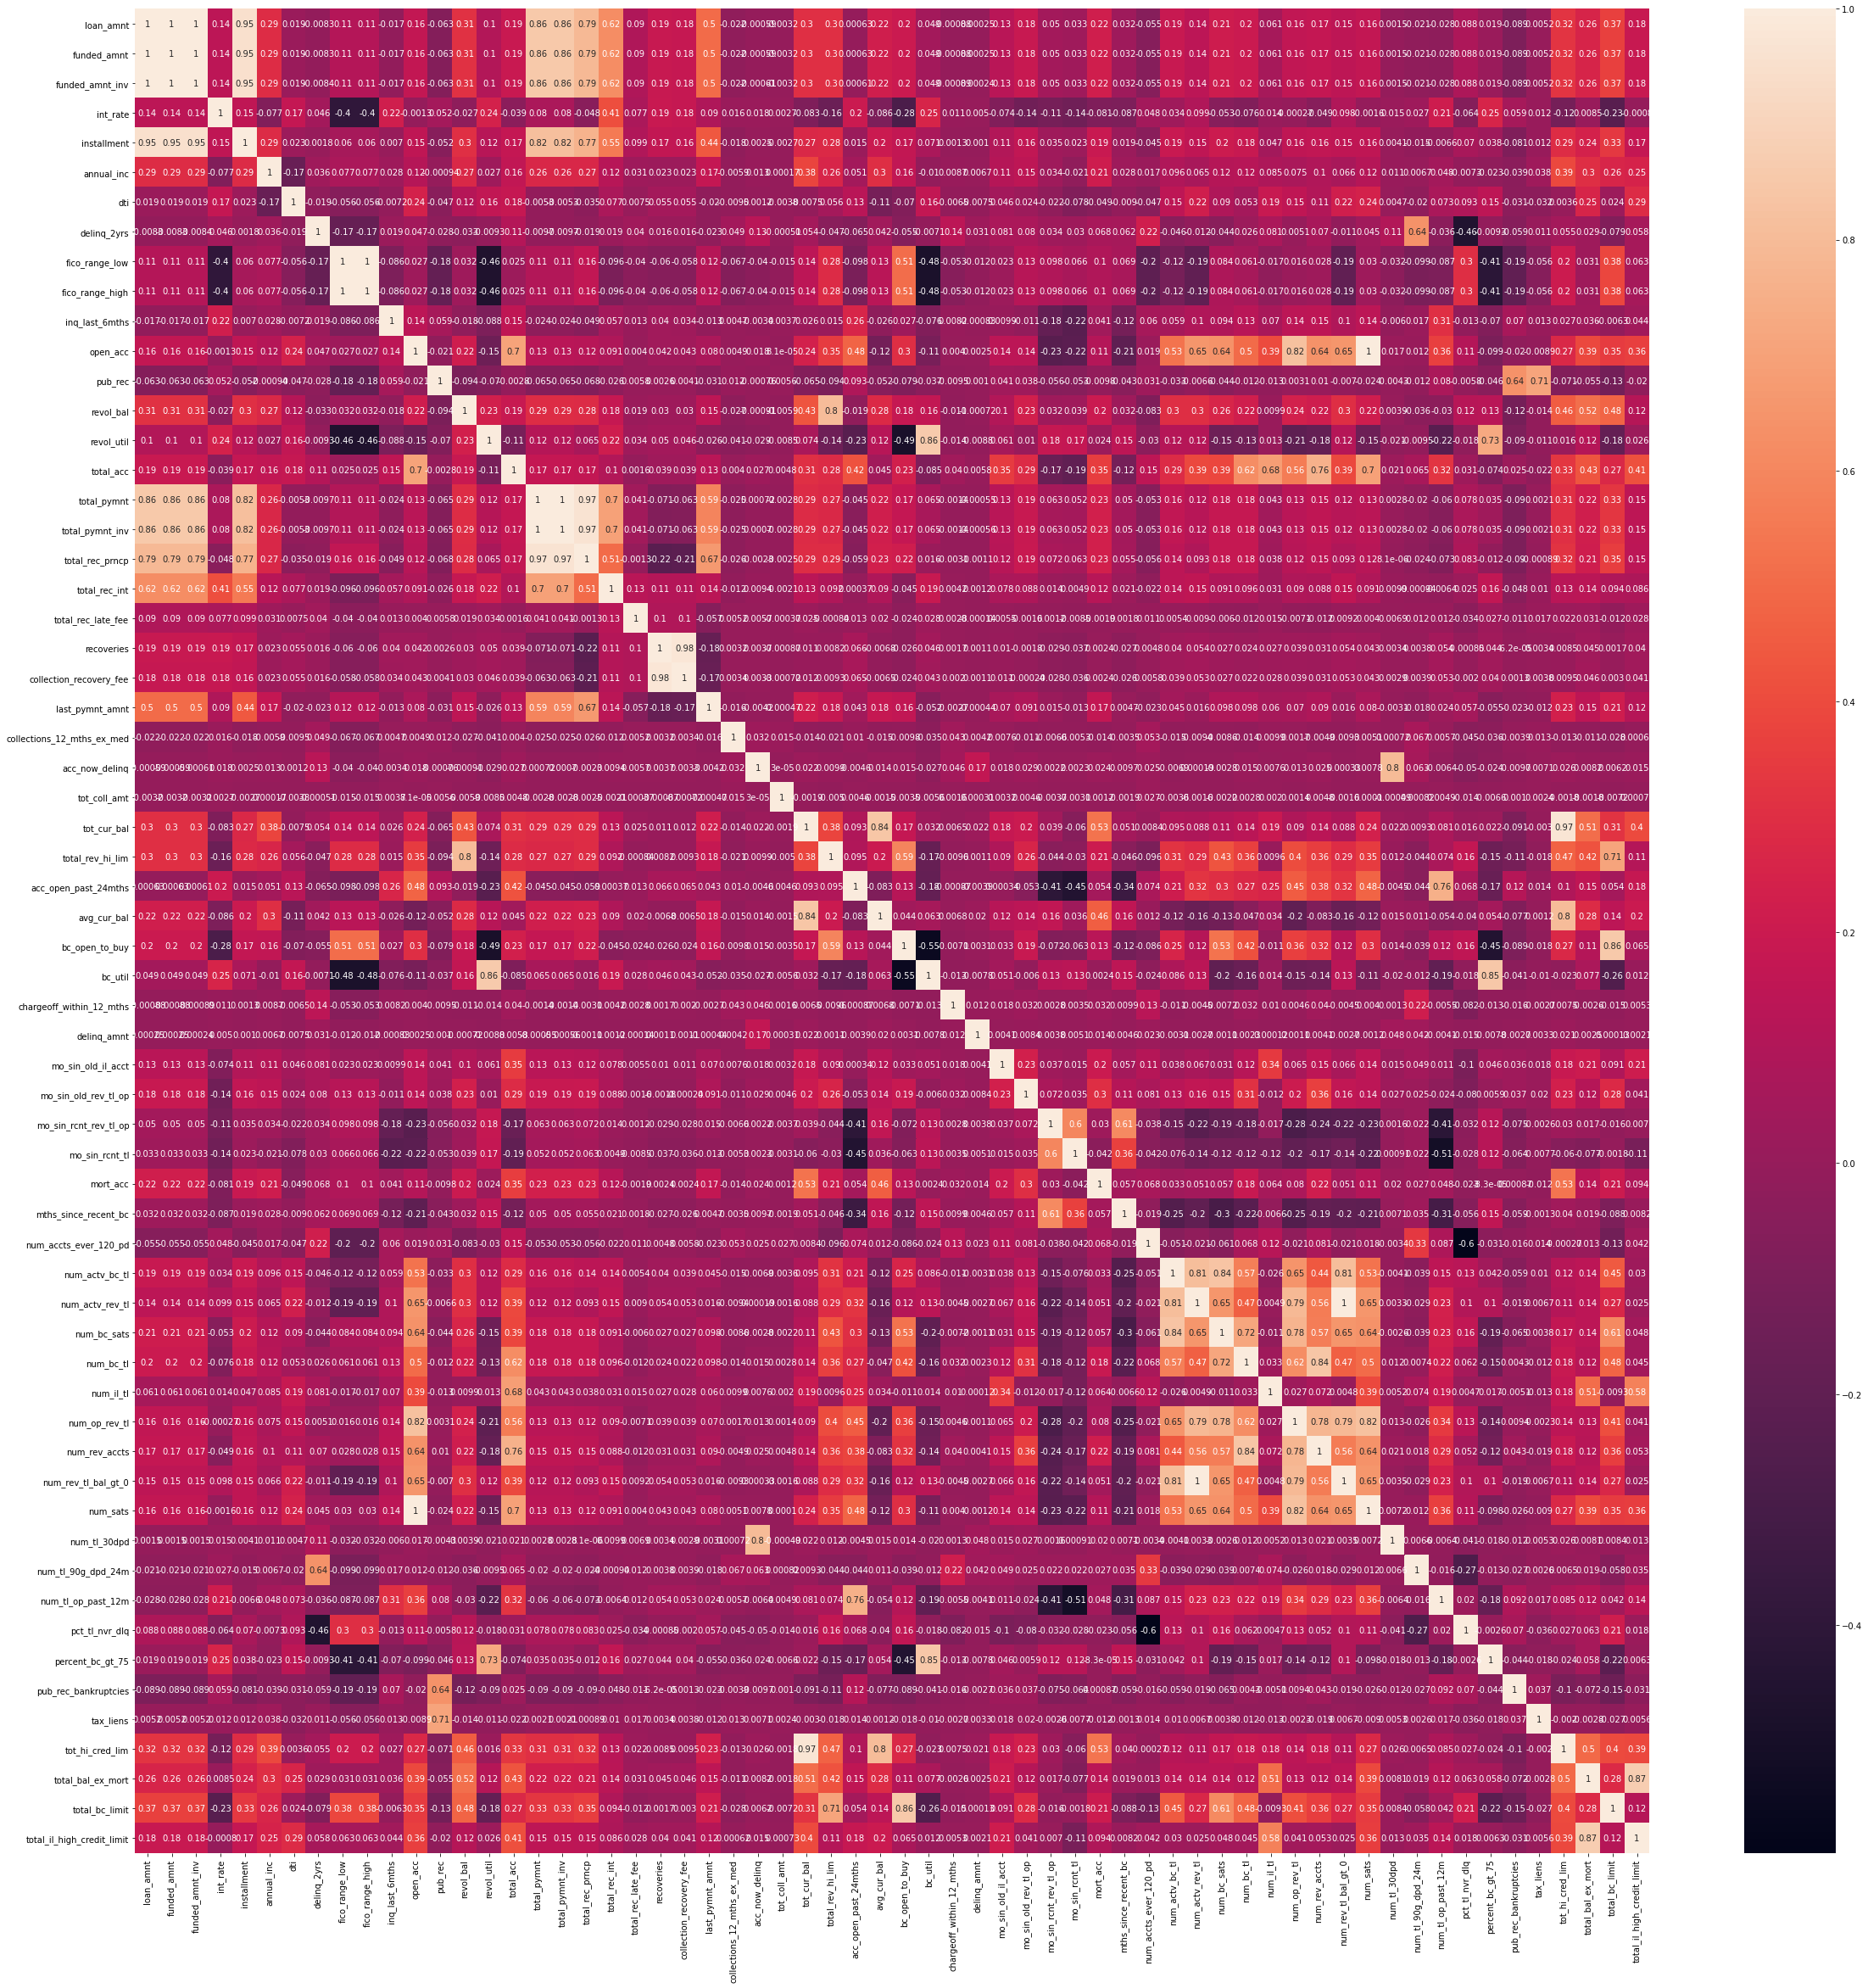

<Figure size 432x288 with 0 Axes>

In [39]:
plt.figure(figsize=(40,40))
sns.heatmap(data.corr(),annot=True)
plt.show()
plt.tight_layout()

## Creating Dummy Variables :

In [40]:
df_cat = data.select_dtypes(include='object').drop('loan_status',axis=1)
df_cat.head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,purpose,addr_state,application_type,debt_settlement_flag,issue_d_month,issue_d_year
0,36,C,C4,leadman,10,MORTGAGE,Not Verified,debt_consolidation,PA,Individual,N,12,2015
1,36,C,C1,Engineer,10,MORTGAGE,Not Verified,small_business,SD,Individual,N,12,2015
2,60,B,B4,truck driver,10,MORTGAGE,Not Verified,home_improvement,IL,Joint App,N,12,2015
3,60,F,F1,Contract Specialist,3,MORTGAGE,Source Verified,major_purchase,PA,Individual,N,12,2015
4,36,C,C3,Veterinary Tecnician,4,RENT,Source Verified,debt_consolidation,GA,Individual,N,12,2015


In [41]:
df_cat.drop(['sub_grade','emp_title','addr_state'],axis=1,inplace=True)

In [42]:
df_dummy = pd.get_dummies(df_cat,drop_first=True)
df_dummy.head()

,term_60,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_1,emp_length_2,emp_length_3,emp_length_4,emp_length_5,emp_length_6,emp_length_7,emp_length_8,emp_length_9,emp_length_10,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_Joint App,debt_settlement_flag_Y,issue_d_month_2,issue_d_month_3,issue_d_month_4,issue_d_month_5,issue_d_month_6,issue_d_month_7,issue_d_month_8,issue_d_month_9,issue_d_month_10,issue_d_month_11,issue_d_month_12,issue_d_year_2013,issue_d_year_2014,issue_d_year_2015,issue_d_year_2016,issue_d_year_2017,issue_d_year_2018
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [43]:
data_final = pd.concat([df_num,df_dummy],axis=1)

In [44]:
data_final.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,...,emp_length_10,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_Joint App,debt_settlement_flag_Y,issue_d_month_2,issue_d_month_3,issue_d_month_4,issue_d_month_5,issue_d_month_6,issue_d_month_7,issue_d_month_8,issue_d_month_9,issue_d_month_10,issue_d_month_11,issue_d_month_12,issue_d_year_2013,issue_d_year_2014,issue_d_year_2015,issue_d_year_2016,issue_d_year_2017,issue_d_year_2018
0,3600.0,3600.0,3600.0,13.99,123.03,55000.0,5.91,0.0,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,4421.72,4421.72,3600.0,821.72,0.0,0.0,0.0,122.67,0.0,0.0,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,...,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,24700.0,24700.0,24700.0,11.99,820.28,65000.0,16.06,1.0,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,25679.66,25679.66,24700.0,979.66,0.0,0.0,0.0,926.35,0.0,0.0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,...,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,20000.0,20000.0,20000.0,10.78,432.66,63000.0,10.78,0.0,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,22705.92,22705.92,20000.0,2705.92,0.0,0.0,0.0,15813.30,0.0,0.0,0.0,189699.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,...,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,10400.0,10400.0,10400.0,22.45,289.91,104433.0,25.37,1.0,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,11740.50,11740.50,10400.0,1340.50,0.0,0.0,0.0,10128.96,0.0,0.0,0.0,331730.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,...,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,11950.0,11950.0,11950.0,13.44,405.18,34000.0,10.20,0.0,690.0,694.0,0.0,5.0,0.0,8822.0,68.4,6.0,13708.95,13708.95,11950.0,1758.95,0.0,0.0,0.0,7653.56,0.0,0.0,0.0,12798.0,12900.0,0.0,2560.0,844.0,91.0,0.0,0.0,338.0,54.0,32.0,32.0,0.0,...,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [45]:
data_final.shape

(1103468, 119)

In [46]:
tar_replace = data['loan_status'].map({'Fully Paid' : 0, 'Charged Off' : 1})
tar_replace

0          0
1          0
2          0
3          0
4          0
          ..
1103463    0
1103464    0
1103465    1
1103466    0
1103467    1
Name: loan_status, Length: 1103468, dtype: int64

***Replacing target variable. Fully Paid = 0, Charged Off = 1*** 

## Standard Scaling :

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
sc = StandardScaler()
X_scaled = sc.fit_transform(data_final)

In [49]:
X = X_scaled
y = tar_replace

## Train-Test Split

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,classification_report,auc

In [53]:
lr = LogisticRegression(random_state=0,max_iter=400)
lr.fit(X_train,y_train)
y_pred_train = lr.predict(X_train)
y_prob_train = lr.predict_proba(X_train)[:,1]
lr_acc_train = accuracy_score(y_train,y_pred_train)
print('Logistic Regression Train Accuracy :',lr_acc_train)

y_pred_test = lr.predict(X_test)
y_prob_test=lr.predict_proba(X_test)[:,1]
lr_acc_test = accuracy_score(y_test,y_pred_test)
print('Logistic Regression Test Accuracy :',lr_acc_test)

Logistic Regression Train Accuracy : 0.998797297349782
Logistic Regression Test Accuracy : 0.9988913759927018


In [54]:
print('Logisitic Regression Model','\n')
print('Confusion_matrix :','\n',confusion_matrix(y_test,y_pred_test),'\n')
print('Classification Report :','\n',classification_report(y_test,y_pred_test),'\n')
print('ROC_AUC score :',roc_auc_score(y_test,y_pred_test))

Logisitic Regression Model 

Confusion_matrix : 
 [[266741      7]
 [   360  63933]] 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    266748
           1       1.00      0.99      1.00     64293

    accuracy                           1.00    331041
   macro avg       1.00      1.00      1.00    331041
weighted avg       1.00      1.00      1.00    331041
 

ROC_AUC score : 0.9971871962992773


## **Feature Selection :**

In [55]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [56]:
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# Build step forward feature selection
sfs1 = sfs(clf,
           k_features='best',
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_scaled, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  8.3min remaining:    0.0s

STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

KeyError: ignored

In [57]:
# Which features?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

TypeError: ignored

## Random Forest Model

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf = RandomForestClassifier(n_estimators=42)

In [58]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=42,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
rf.score(X_train,y_train)

0.9999831699306213

In [60]:
rf.score(X_test,y_test)

0.9972450542379947

In [61]:
rf_pred_train = rf.predict(X_train)
rf_pred_test = rf.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
print('Accuracy Score for training set :',accuracy_score(y_train,rf_pred_train))

Accuracy Score for training set : 0.9999831699306213


In [64]:
print('Accuracy Score for training set :',accuracy_score(y_test,rf_pred_test))

Accuracy Score for training set : 0.9972450542379947


In [65]:
from sklearn.metrics import classification_report, confusion_matrix

In [66]:
print(classification_report(rf_pred_test,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    267656
           1       0.99      1.00      0.99     63385

    accuracy                           1.00    331041
   macro avg       0.99      1.00      1.00    331041
weighted avg       1.00      1.00      1.00    331041



In [67]:
print(confusion_matrix(rf_pred_test,y_test))

[[266746    910]
 [     2  63383]]


## Feature Importance

In [68]:
names = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths',
       'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
       'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
       'mths_since_recent_bc', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
       'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl',
       'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats',
       'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
       'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
       'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit','term_60', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F',
       'grade_G', 'emp_length_1', 'emp_length_2', 'emp_length_3',
       'emp_length_4', 'emp_length_5', 'emp_length_6', 'emp_length_7',
       'emp_length_8', 'emp_length_9', 'emp_length_10',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'application_type_Joint App',
       'debt_settlement_flag_Y', 'issue_d_month_2', 'issue_d_month_3',
       'issue_d_month_4', 'issue_d_month_5', 'issue_d_month_6',
       'issue_d_month_7', 'issue_d_month_8', 'issue_d_month_9',
       'issue_d_month_10', 'issue_d_month_11', 'issue_d_month_12',
       'issue_d_year_2013', 'issue_d_year_2014', 'issue_d_year_2015',
       'issue_d_year_2016', 'issue_d_year_2017', 'issue_d_year_2018']

In [69]:
names_index = names

In [70]:
def variable_importance(fit):
   
    try:
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)["estimators_"]:
            return print("Model does not appear to be trained.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")

    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}

In [71]:
var_imp_rf = variable_importance(rf)

importances_rf = var_imp_rf['importance']

indices_rf = var_imp_rf['index']




In [72]:
def print_var_importance(importance, indices, name_index):
    print("Feature ranking:")

    for f in range(0, indices.shape[0]):
        i = f
        print("{0}. The feature '{1}' has a Mean Decrease in Impurity of {2:.5f}"
              .format(f + 1,
                      names_index[indices[i]],
                      importance[indices[f]]))
print_var_importance(importances_rf, indices_rf, names_index)

Feature ranking:
1. The feature 'recoveries' has a Mean Decrease in Impurity of 0.21923
2. The feature 'collection_recovery_fee' has a Mean Decrease in Impurity of 0.17201
3. The feature 'total_rec_prncp' has a Mean Decrease in Impurity of 0.13888
4. The feature 'last_pymnt_amnt' has a Mean Decrease in Impurity of 0.07352
5. The feature 'total_pymnt' has a Mean Decrease in Impurity of 0.06887
6. The feature 'total_pymnt_inv' has a Mean Decrease in Impurity of 0.06762
7. The feature 'funded_amnt' has a Mean Decrease in Impurity of 0.04102
8. The feature 'loan_amnt' has a Mean Decrease in Impurity of 0.03366
9. The feature 'installment' has a Mean Decrease in Impurity of 0.03297
10. The feature 'debt_settlement_flag_Y' has a Mean Decrease in Impurity of 0.03254
11. The feature 'funded_amnt_inv' has a Mean Decrease in Impurity of 0.03222
12. The feature 'total_rec_int' has a Mean Decrease in Impurity of 0.01432
13. The feature 'int_rate' has a Mean Decrease in Impurity of 0.00995
14. The 

In [73]:
def variable_importance_plot(importance, indices, name_index):
    index = np.arange(len(names_index))

    importance_desc = sorted(importance)
    feature_space = []
    for i in range(indices.shape[0] - 1, -1, -1):
        feature_space.append(names_index[indices[i]])

    fig, ax = plt.subplots(figsize=(20, 20))

    plt.title('Feature importances for Random Forest Model\
    \nPeer to Peer Lending')
    plt.barh(index,
             importance_desc,
             color = '#875FDB')
    plt.yticks(index,
               feature_space)

    #plt.ylim(-1, 30)
    #plt.xlim(0, max(importance_desc) + 0.1)
    plt.xlabel('Mean Decrease in Impurity')
    plt.ylabel('Feature')

    plt.show()
    plt.tight_layout()

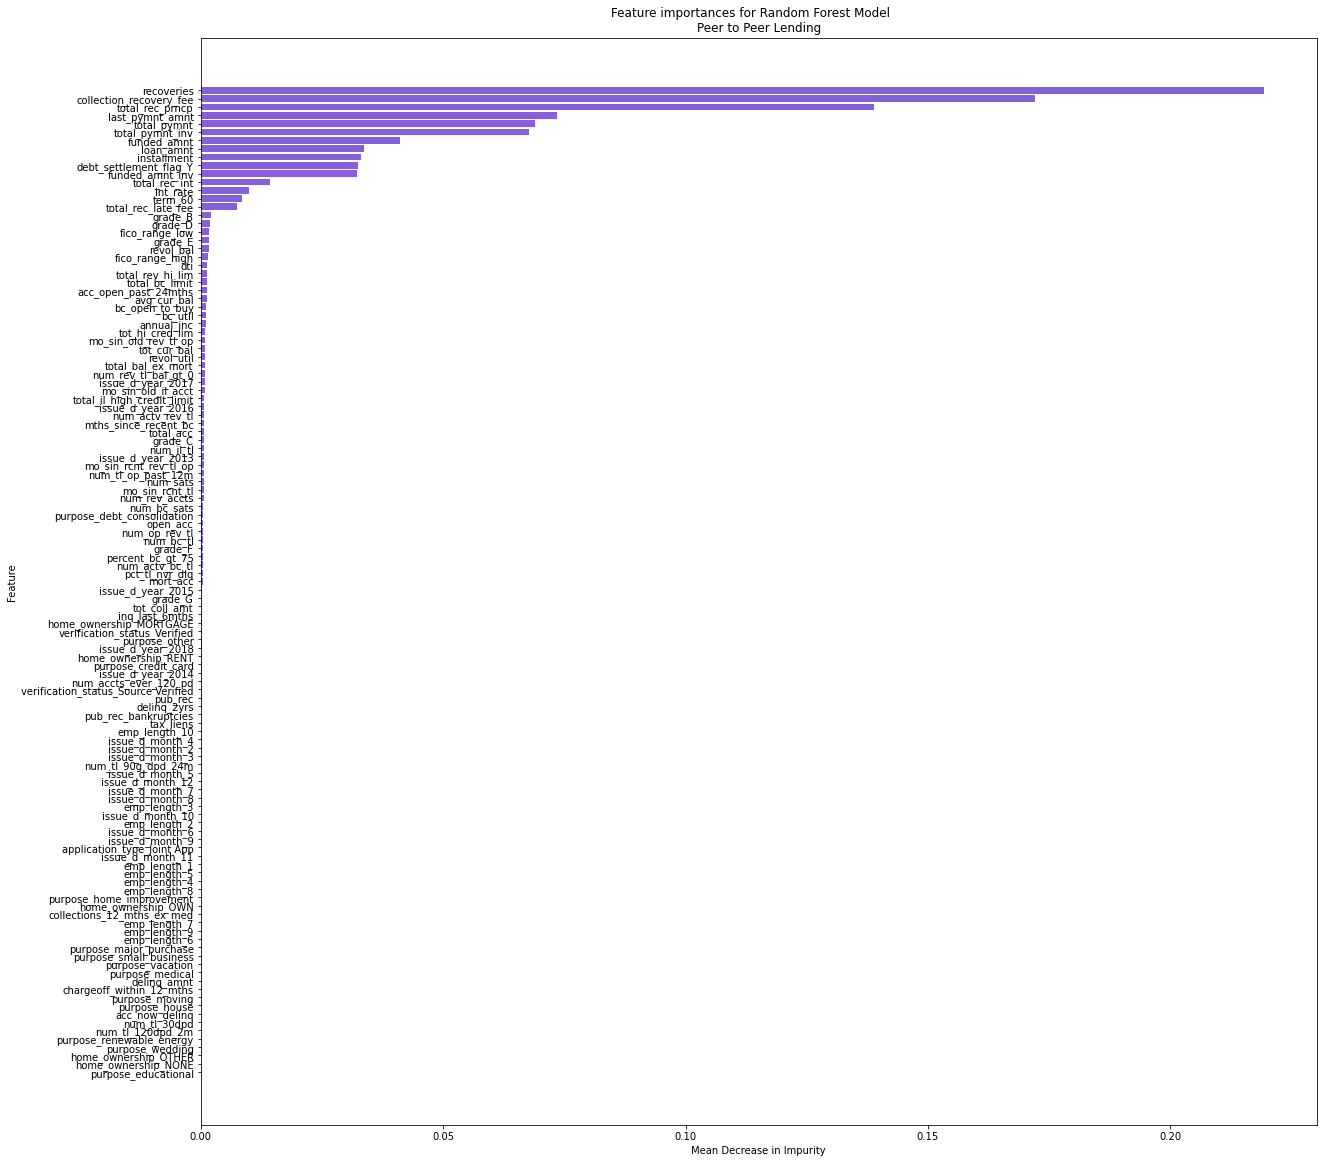

<Figure size 432x288 with 0 Axes>

In [74]:
variable_importance_plot(importances_rf, indices_rf, names_index)

In [76]:
df_model = data_final[['collection_recovery_fee','recoveries','total_rec_prncp','last_pymnt_amnt','total_pymnt','total_pymnt_inv','funded_amnt_inv','funded_amnt','loan_amnt',
'installment','debt_settlement_flag_Y','term_60','total_rec_int','int_rate','total_rec_late_fee','dti','grade_E','grade_D','fico_range_high','fico_range_low',
'revol_bal','grade_F','tot_hi_cred_lim','total_rev_hi_lim','bc_open_to_buy','annual_inc','acc_open_past_24mths','tot_cur_bal','mo_sin_old_rev_tl_op','avg_cur_bal']]

In [77]:
df_model.head()

,collection_recovery_fee,recoveries,total_rec_prncp,last_pymnt_amnt,total_pymnt,total_pymnt_inv,funded_amnt_inv,funded_amnt,loan_amnt,installment,debt_settlement_flag_Y,term_60,total_rec_int,int_rate,total_rec_late_fee,dti,grade_E,grade_D,fico_range_high,fico_range_low,revol_bal,grade_F,tot_hi_cred_lim,total_rev_hi_lim,bc_open_to_buy,annual_inc,acc_open_past_24mths,tot_cur_bal,mo_sin_old_rev_tl_op,avg_cur_bal
0,0.0,0.0,3600.0,122.67,4421.72,4421.72,3600.0,3600.0,3600.0,123.03,0,0,821.72,13.99,0.0,5.91,0,0,679.0,675.0,2765.0,0,178050.0,9300.0,1506.0,55000.0,4.0,144904.0,128.0,20701.0
1,0.0,0.0,24700.0,926.35,25679.66,25679.66,24700.0,24700.0,24700.0,820.28,0,0,979.66,11.99,0.0,16.06,0,0,719.0,715.0,21470.0,0,314017.0,111800.0,57830.0,65000.0,4.0,204396.0,192.0,9733.0
2,0.0,0.0,20000.0,15813.30,22705.92,22705.92,20000.0,20000.0,20000.0,432.66,0,1,2705.92,10.78,0.0,10.78,0,0,699.0,695.0,7869.0,0,218418.0,14000.0,2737.0,63000.0,6.0,189699.0,184.0,31617.0
3,0.0,0.0,10400.0,10128.96,11740.50,11740.50,10400.0,10400.0,10400.0,289.91,0,1,1340.50,22.45,0.0,25.37,0,0,699.0,695.0,21929.0,1,439570.0,34000.0,4567.0,104433.0,10.0,331730.0,210.0,27644.0
4,0.0,0.0,11950.0,7653.56,13708.95,13708.95,11950.0,11950.0,11950.0,405.18,0,0,1758.95,13.44,0.0,10.20,0,0,694.0,690.0,8822.0,0,16900.0,12900.0,844.0,34000.0,0.0,12798.0,54.0,2560.0


In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
sc = StandardScaler()
X_scaled = sc.fit_transform(df_model)

In [80]:
X = X_scaled
y = tar_replace

In [81]:
y.value_counts()

0    889993
1    213475
Name: loan_status, dtype: int64

## **Train-Test Split**

In [82]:
from sklearn.model_selection import train_test_split

In [1]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

NameError: ignored

In [84]:
print('X_train :',X_train.shape)
print('X_test :',X_test.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)

X_train : (772427, 30)
X_test : (331041, 30)
y_train : (772427,)
y_test : (331041,)


## **Logistic Regression**

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,classification_report,auc

In [86]:
lr = LogisticRegression(random_state=0,max_iter=400)
lr.fit(X_train,y_train)
y_pred_train = lr.predict(X_train)
y_prob_train = lr.predict_proba(X_train)[:,1]
lr_acc_train = accuracy_score(y_train,y_pred_train)
print('Logistic Regression Train Accuracy :',lr_acc_train)

y_pred_test = lr.predict(X_test)
y_prob_test=lr.predict_proba(X_test)[:,1]
lr_acc_test = accuracy_score(y_test,y_pred_test)
print('Logistic Regression Test Accuracy :',lr_acc_test)

Logistic Regression Train Accuracy : 0.9987960027290604
Logistic Regression Test Accuracy : 0.9988762721233926


In [87]:
print('Logisitic Regression Model','\n')
print('Confusion_matrix :','\n',confusion_matrix(y_test,y_pred_test),'\n')
print('Classification Report :','\n',classification_report(y_test,y_pred_test),'\n')
print('ROC_AUC score :',roc_auc_score(y_test,y_pred_test))

Logisitic Regression Model 

Confusion_matrix : 
 [[266741      7]
 [   365  63928]] 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    266748
           1       1.00      0.99      1.00     64293

    accuracy                           1.00    331041
   macro avg       1.00      1.00      1.00    331041
weighted avg       1.00      1.00      1.00    331041
 

ROC_AUC score : 0.9971483118172965


In [88]:
data_prob=pd.DataFrame([y_test.values,y_prob_test]).T

In [89]:
data_prob.columns=['y','y_prob']
data_prob.head()

,y,y_prob
0,0.0,1.249619e-08
1,1.0,1.000000e+00
2,1.0,1.000000e+00
3,0.0,7.509487e-04
4,0.0,6.074023e-03


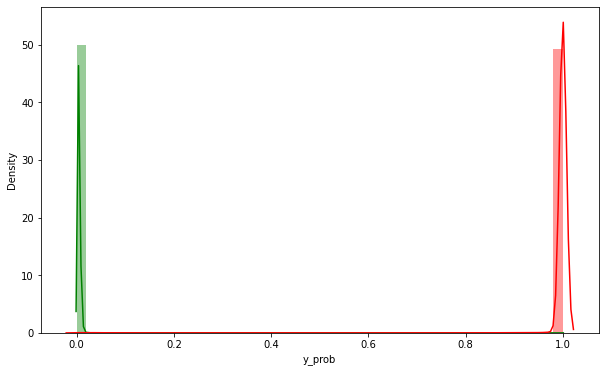

In [90]:
plt.figure(figsize=(10,6))
sns.distplot(data_prob['y_prob'][data_prob['y']==0],color='g')
sns.distplot(data_prob['y_prob'][data_prob['y']==1],color='r')
plt.show()

## **Random Forest Model**

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
rf = RandomForestClassifier(n_estimators=50, max_depth=10)
rf.fit(X_train,y_train)
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)
rf_acc_train = accuracy_score(y_train,y_pred_train_rf)
print('Random Forest Train Accuracy :',rf_acc_train)
rf_acc_test = accuracy_score(y_test,y_pred_test_rf)
print('Random Forest Test Accuracy :',rf_acc_test)

Random Forest Train Accuracy : 0.9933754257683898
Random Forest Test Accuracy : 0.9931549264290526


In [93]:
pred_prob_rf = rf.predict_proba(X_test)[:,1]
fpr2 , tpr2, _ = roc_curve(y_test,pred_prob_rf,pos_label=1)

In [94]:
auc_rf = auc(fpr2,tpr2)

In [95]:
print('Random Forest Model','\n')
print('Confusion_matrix :','\n',confusion_matrix(y_test,y_pred_test_rf),'\n')
print('Classification Report :','\n',classification_report(y_test,y_pred_test_rf),'\n')
print('ROC_AUC score :',roc_auc_score(y_test,y_pred_test_rf))

Random Forest Model 

Confusion_matrix : 
 [[266746      2]
 [  2264  62029]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    266748
           1       1.00      0.96      0.98     64293

    accuracy                           0.99    331041
   macro avg       1.00      0.98      0.99    331041
weighted avg       0.99      0.99      0.99    331041
 

ROC_AUC score : 0.9823893577024356


## **Decision Tree Model**

In [96]:
from sklearn.tree import DecisionTreeClassifier

In [97]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)
dt_acc_train = accuracy_score(y_train,y_pred_train_dt)
print('Descision Tree Train Accuracy :',dt_acc_train)
dt_acc_test = accuracy_score(y_test,y_pred_test_dt)
print('Descision Tree Test Accuracy :',dt_acc_test)

Descision Tree Train Accuracy : 1.0
Descision Tree Test Accuracy : 0.9989517914699387


In [98]:
print('Descision Tree Model','\n')
print('Confusion_matrix :','\n',confusion_matrix(y_test,y_pred_test_rf),'\n')
print('Classification Report :','\n',classification_report(y_test,y_pred_test_rf),'\n')
print('ROC_AUC score :',roc_auc_score(y_test,y_pred_test_rf))

Descision Tree Model 

Confusion_matrix : 
 [[266746      2]
 [  2264  62029]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    266748
           1       1.00      0.96      0.98     64293

    accuracy                           0.99    331041
   macro avg       1.00      0.98      0.99    331041
weighted avg       0.99      0.99      0.99    331041
 

ROC_AUC score : 0.9823893577024356


## **Naives Bayes Model**

In [99]:
from sklearn.naive_bayes import GaussianNB

In [100]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred_train_gnb = gnb.predict(X_train)
y_pred_test_gnb = gnb.predict(X_test)
gnb_acc_train = accuracy_score(y_train,y_pred_train_gnb)
print('Naive Bayes Train Accuracy :',gnb_acc_train)
gnb_acc_test = accuracy_score(y_test,y_pred_test_gnb)
print('Naive Bayes Test Accuracy :',gnb_acc_test)

Naive Bayes Train Accuracy : 0.9435493580623153
Naive Bayes Test Accuracy : 0.9432245552665682


In [101]:
print('Naive Bayes Model','\n')
print('Confusion_matrix :','\n',confusion_matrix(y_test,y_pred_test_gnb),'\n')
print('Classification Report :','\n',classification_report(y_test,y_pred_test_gnb),'\n')
print('ROC_AUC score :',roc_auc_score(y_test,y_pred_test_gnb))

Naive Bayes Model 

Confusion_matrix : 
 [[266355    393]
 [ 18402  45891]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97    266748
           1       0.99      0.71      0.83     64293

    accuracy                           0.94    331041
   macro avg       0.96      0.86      0.90    331041
weighted avg       0.95      0.94      0.94    331041
 

ROC_AUC score : 0.8561529021957296


In [107]:
accuracy = pd.DataFrame({'Logistic Regression':[lr_acc_train, lr_acc_test], 'Random Forest':[rf_acc_train, rf_acc_test],
                         'Decision Tree':[dt_acc_train,dt_acc_test],'Naive Bayes':[gnb_acc_train,gnb_acc_test]}, index = ['Train','Test'])
accuracy

,Logistic Regression,Random Forest,Decision Tree,Naive Bayes
Train,0.998796,0.993375,1.000000,0.943549
Test,0.998876,0.993155,0.998952,0.943225


## **Cross Validation for all models :**

In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold

In [110]:
clf1 = LogisticRegression(max_iter = 300)
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = RandomForestClassifier(random_state=42)
clf4 = GaussianNB()
clf5 = XGBClassifier(random_state=42)

In [111]:
kf = KFold(n_splits=5,shuffle=True,random_state=42)

In [112]:
for i,j in zip([clf1,clf2,clf3,clf4,clf5],['LR','DT','RF','GNB','XGB']):
    score = cross_val_score(i, X_scaled, y, cv = kf, scoring = 'accuracy')
    print('Accuracy Score :')
    print(j,':','Bias Error :',np.mean(score),',','Variance Error :',np.std(score)/np.mean(score))

Accuracy Score :
LR : Bias Error : 0.9988472705056598 , Variance Error : 6.521241546464274e-05
Accuracy Score :
DT : Bias Error : 0.9990140175595504 , Variance Error : 4.5502771039015376e-05
Accuracy Score :
RF : Bias Error : 0.9990856100930726 , Variance Error : 2.9448137103179978e-05
Accuracy Score :
GNB : Bias Error : 0.9434328861656256 , Variance Error : 0.0004389770586257387
Accuracy Score :
XGB : Bias Error : 0.9961050069718667 , Variance Error : 0.00010632110289487262


In [113]:
for i,j in zip([clf1,clf2,clf3,clf4,clf5],['LR','DT','RF','GNB','XGB']):
    score = cross_val_score(i, X_scaled, y, cv = kf, scoring = 'recall')
    print('F1 Score :')
    print(j,':','Bias Error :',np.mean(score),',','Variance Error :',np.std(score)/np.mean(score))

F1 Score :
LR : Bias Error : 0.9940867981959529 , Variance Error : 0.0003945153700324349
F1 Score :
DT : Bias Error : 0.9973201578509683 , Variance Error : 0.00023385534937096344
F1 Score :
RF : Bias Error : 0.9952871118035584 , Variance Error : 0.00016817635702696276
F1 Score :
GNB : Bias Error : 0.7132153257500363 , Variance Error : 0.00238458780772248
F1 Score :
XGB : Bias Error : 0.9798773015849294 , Variance Error : 0.00066185834024832


In [114]:
for i,j in zip([clf1,clf2,clf3,clf4,clf5],['LR','DT','RF','GNB','XGB']):
    score = cross_val_score(i, X_scaled, y, cv = kf, scoring = 'roc_auc')
    print('ROC_AUC Score :')
    print(j,':','Bias Error :',np.mean(score),',','Variance Error :',np.std(score)/np.mean(score))

ROC_AUC Score :
LR : Bias Error : 0.9998084657835522 , Variance Error : 7.884471407869303e-05
ROC_AUC Score :
DT : Bias Error : 0.9983701863822926 , Variance Error : 0.00011354006767740006
ROC_AUC Score :
RF : Bias Error : 0.9999268869649551 , Variance Error : 2.3763266195790724e-05
ROC_AUC Score :
GNB : Bias Error : 0.9794098783977983 , Variance Error : 0.0003323152616250459
ROC_AUC Score :
XGB : Bias Error : 0.9997172390001217 , Variance Error : 2.889056740056901e-05
